# Centralities

In [1]:
import sys
import os
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the directory containing neo4j_utils.py (assuming test.ipynb is in task_1 folder)
module_path = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..', 'utils'))

# Check if the path is already in sys.path and add it if not
if module_path not in sys.path:
    print(f"Adding {module_path} to sys.path")
    sys.path.append(module_path)

import neo4j_utils as neo4j

# Get the instance of the Neo4jConnection
db = neo4j.Neo4jConnection.get_instance()

# Verify the connection
if db.verify_connection():
    print("Connection to Neo4j is successful!")
else:
    print("Connection to Neo4j failed!")

# close the connection
db.close()

Adding /Users/daniels/Projects/DSSS2024/utils to sys.path
Connection to Neo4j is successful!


In [2]:
# Get the instance of the Neo4jConnection
db = neo4j.Neo4jConnection.get_instance()

# Load subgraph of largest community
subgraph = db.subgraph_largest_community()

# TODO

# close the connection
db.close()

In [4]:
# Get the instance of the Neo4jConnection
db = neo4j.Neo4jConnection.get_instance()

# Load subgraph of largest community
subgraph = db.subgraph_largest_community()

# Calculate betweenness centrality for all nodes using NetworkX function
betweenness_centrality = nx.betweenness_centrality(subgraph)

# Print the betweenness centrality values
print("Betweenness centrality for nodes in the largest community subgraph:")
for node, centrality in betweenness_centrality.items():
    print(f"Node: {node}, Betweenness Centrality: {centrality}")

# Close the Neo4j connection when done
db.close()

Betweenness centrality for nodes in the largest community subgraph:
Node: Quhuru-Mo, Betweenness Centrality: 0.0
Node: Big-Boil, Betweenness Centrality: 0.0
Node: Fulk, Betweenness Centrality: 0.0
Node: Kegs, Betweenness Centrality: 0.00020224595108135482
Node: Munda, Betweenness Centrality: 0.0
Node: Dick-Follard, Betweenness Centrality: 0.0
Node: Brus-Buckler, Betweenness Centrality: 0.0
Node: Garth-(Wolfs-Den), Betweenness Centrality: 0.0
Node: Mully, Betweenness Centrality: 0.0007659760874046587
Node: Dryn, Betweenness Centrality: 0.0
Node: Alliser-Thorne, Betweenness Centrality: 0.004038783328769659
Node: Pylos, Betweenness Centrality: 8.658008658008658e-05
Node: Grigg, Betweenness Centrality: 2.1645021645021645e-05
Node: Tycho-Nestoris, Betweenness Centrality: 0.0
Node: Patrek-of-Kings-Mountain, Betweenness Centrality: 2.1645021645021645e-05
Node: Azor-Ahai, Betweenness Centrality: 0.0
Node: Ryk, Betweenness Centrality: 0.0
Node: Blane, Betweenness Centrality: 0.0
Node: Ygritte, 

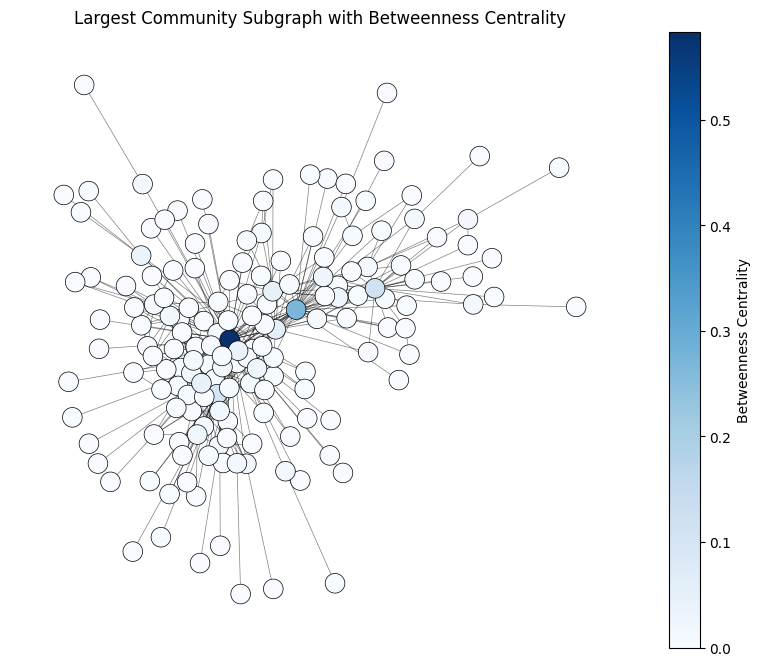

In [5]:
# Get the instance of the Neo4jConnection
db = neo4j.Neo4jConnection.get_instance()

# Load data into NetworkX
graph = db.load_data_into_networkx()

# Load subgraph of largest community
largest_community = db.subgraph_largest_community()

# Calculate betweenness centrality for all nodes in the largest community using NetworkX function
betweenness_centrality = nx.betweenness_centrality(largest_community)

# Draw the largest community subgraph with node colors based on betweenness centrality
pos = nx.spring_layout(largest_community, k=0.5, iterations=1000)
plt.figure(figsize=(10, 8))

# Draw nodes with colors based on betweenness centrality
node_size = 200
node_color = list(betweenness_centrality.values())
nodes = nx.draw_networkx_nodes(largest_community, pos, node_size=node_size, cmap=plt.cm.Blues,
                               node_color=node_color, edgecolors='k', linewidths=0.5)
nx.draw_networkx_edges(largest_community, pos, alpha=0.5, width=0.5)

plt.colorbar(nodes, label='Betweenness Centrality')  # Add colorbar for node colors
plt.title('Largest Community Subgraph with Betweenness Centrality')
plt.axis('off')
plt.show()

# Close the Neo4j connection when done
db.close()